In [12]:
from configure_dataframes import directory_to_dataframe
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = directory_to_dataframe("data")

In [14]:
df

,label,start_time,file_path,instrument,burst_type
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2
1,burst,2023-02-20 15:09:00,data/2/2023-02-20 15-09-00_2023-02-20 15-10-00...,humain_59,2
2,burst,2022-05-19 12:09:00,data/2/2022-05-19 12-09-00_2022-05-19 12-10-00...,humain_59,2
3,burst,2022-05-28 16:03:00,data/2/2022-05-28 16-03-00_2022-05-28 16-04-00...,humain_59,2
4,burst,2022-03-28 11:32:00,data/2/2022-03-28 11-32-00_2022-03-28 11-33-00...,humain_59,2
...,...,...,...,...,...
115682,no_burst,2023-04-06 21:23:00,data/no_burst/2023-04-06 21-23-00_2023-04-06 2...,australia_assa_62,no_burst
115683,no_burst,2021-11-03 21:40:00,data/no_burst/2021-11-03 21-40-00_2021-11-03 2...,australia_assa_01,no_burst
115684,no_burst,2022-10-23 19:45:00,data/no_burst/2022-10-23 19-45-00_2022-10-23 1...,alaska_haarp_62,no_burst
115685,no_burst,2021-08-09 03:03:00,data/no_burst/2021-08-09 03-03-00_2021-08-09 0...,australia_assa_02,no_burst


In [15]:
to_check = [
    "australia_assa_02",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
]

In [16]:
df = df[df.instrument.isin(to_check)]
df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)

/tmp/ipykernel_306885/3283154757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)


In [6]:
df

,label,start_time,file_path,instrument,burst_type,is_burst
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2,1
7,burst,2022-07-04 13:47:00,data/2/2022-07-04 13-47-00_2022-07-04 13-48-00...,alaska_haarp_62,2,1
15,burst,2021-05-22 03:04:00,data/2/2021-05-22 03-04-00_2021-05-22 03-05-00...,australia_assa_02,2,1
18,burst,2023-06-20 17:09:00,data/2/2023-06-20 17-09-00_2023-06-20 17-10-00...,alaska_haarp_62,2,1
19,burst,2022-03-30 17:42:00,data/2/2022-03-30 17-42-00_2022-03-30 17-43-00...,alaska_haarp_62,2,1
...,...,...,...,...,...,...
103059,no_burst,2021-06-25 01:27:00,data/no_burst/2021-06-25 01-27-00_2021-06-25 0...,australia_assa_02,no_burst,0
103060,no_burst,2022-03-09 01:17:00,data/no_burst/2022-03-09 01-17-00_2022-03-09 0...,alaska_haarp_62,no_burst,0
103061,no_burst,2022-07-22 04:00:00,data/no_burst/2022-07-22 04-00-00_2022-07-22 0...,alaska_haarp_62,no_burst,0
103062,no_burst,2021-08-27 23:42:00,data/no_burst/2021-08-27 23-42-00_2021-08-27 2...,australia_assa_02,no_burst,0


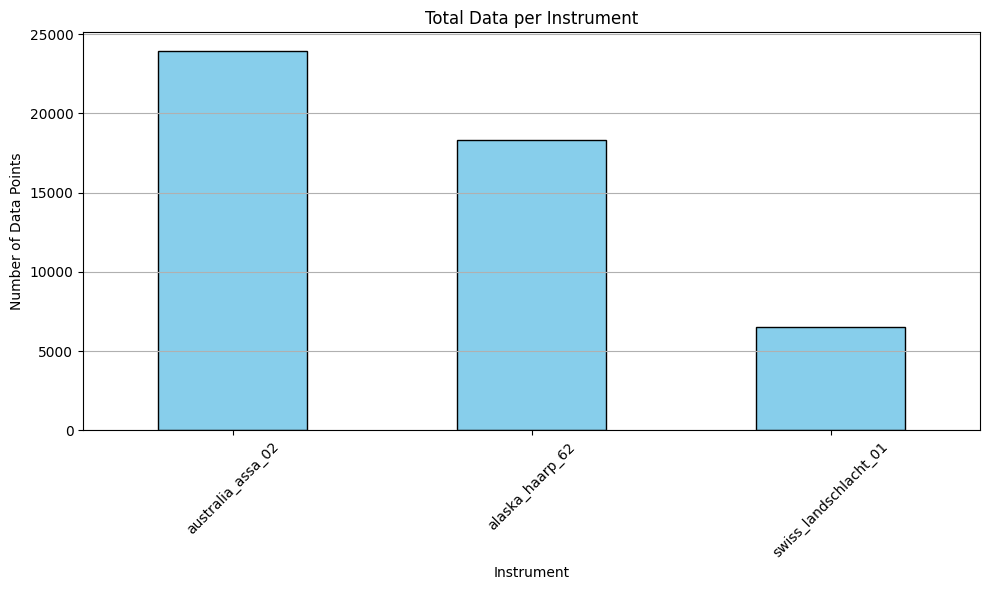

In [7]:
plt.figure(figsize=(10, 6))
df["instrument"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Data per Instrument")
plt.xlabel("Instrument")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

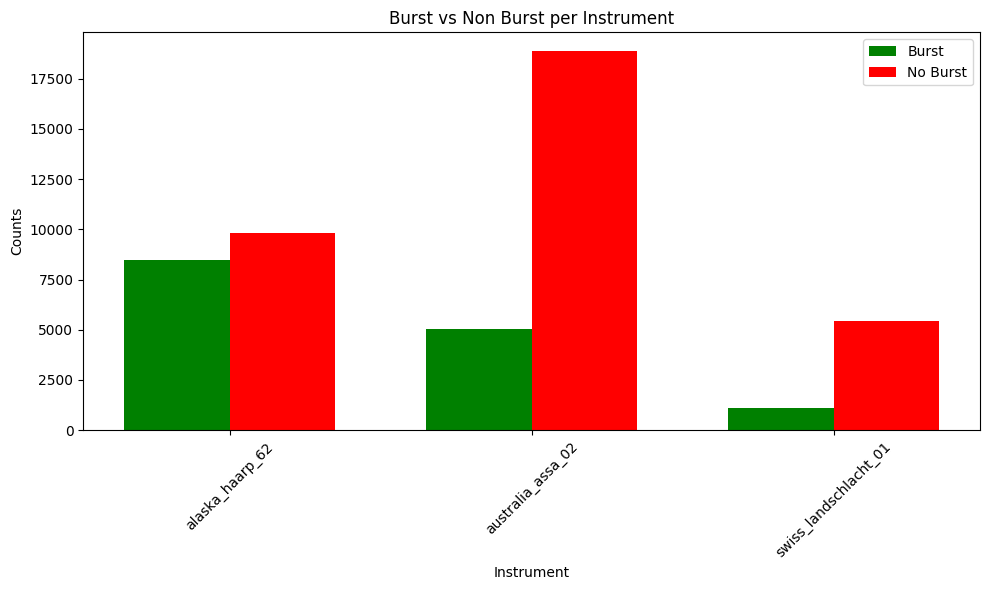

In [8]:
burst_counts = df.groupby("instrument")["is_burst"].sum()
total_counts = df["instrument"].value_counts()
no_burst_counts = total_counts - burst_counts

bar_width = 0.35
indices = range(len(burst_counts))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(indices, burst_counts, bar_width, label="Burst", color="green")
bar2 = plt.bar(
    [i + bar_width for i in indices],
    no_burst_counts,
    bar_width,
    label="No Burst",
    color="red",
)

plt.xlabel("Instrument")
plt.ylabel("Counts")
plt.title("Burst vs Non Burst per Instrument")
plt.xticks([i + bar_width / 2 for i in indices], burst_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

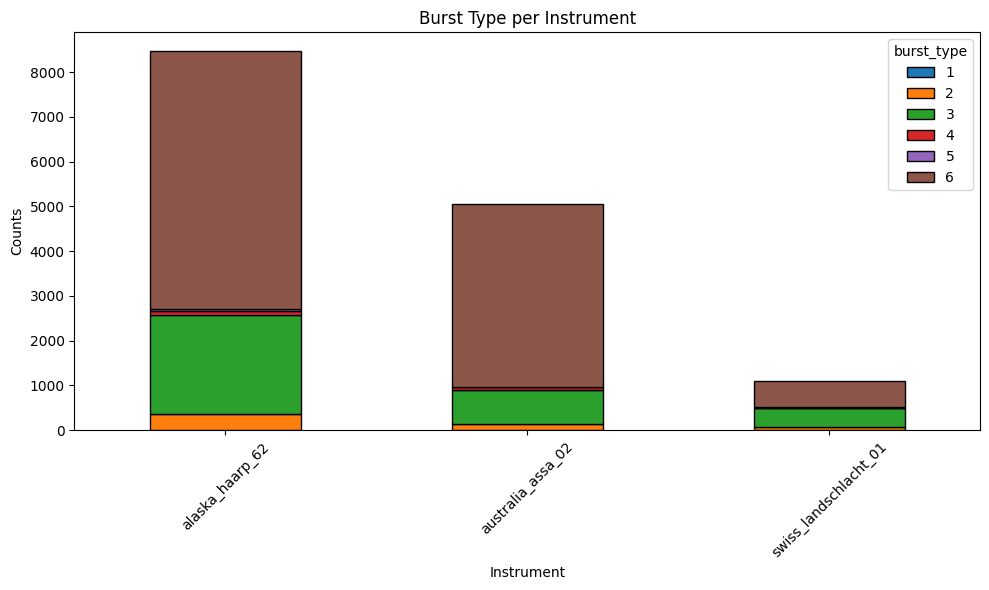

In [9]:
# Assuming that the 'burst_type' column is added to your DataFrame:
burst_type_counts = (
    df[df["is_burst"] == 1]
    .groupby(["instrument", "burst_type"])
    .size()
    .unstack()
    .fillna(0)
)

burst_type_counts.plot(kind="bar", stacked=True, figsize=(10, 6), edgecolor="black")
plt.title("Burst Type per Instrument")
plt.xlabel("Instrument")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_306885/2415748296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_time"] = pd.to_datetime(df["start_time"])


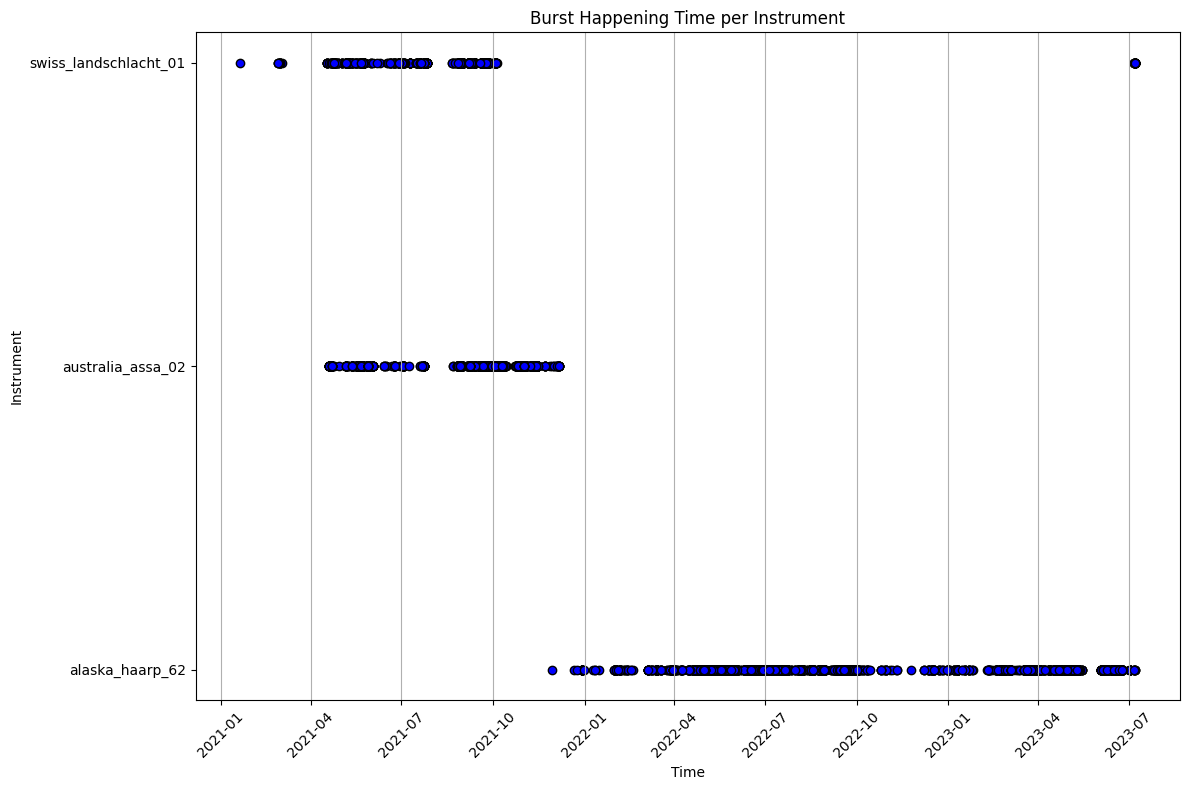

In [10]:
# Converting the 'start_time' to datetime
df["start_time"] = pd.to_datetime(df["start_time"])

# Selecting only the rows where a burst occurred
burst_data = df[df["is_burst"] == 1]

plt.figure(figsize=(12, 8))
plt.scatter(
    burst_data["start_time"], burst_data["instrument"], c="blue", edgecolor="black"
)

plt.title("Burst Happening Time per Instrument")
plt.xlabel("Time")
plt.ylabel("Instrument")
plt.xticks(rotation=45)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

/tmp/ipykernel_306885/1374126416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"] = df["start_time"].dt.hour


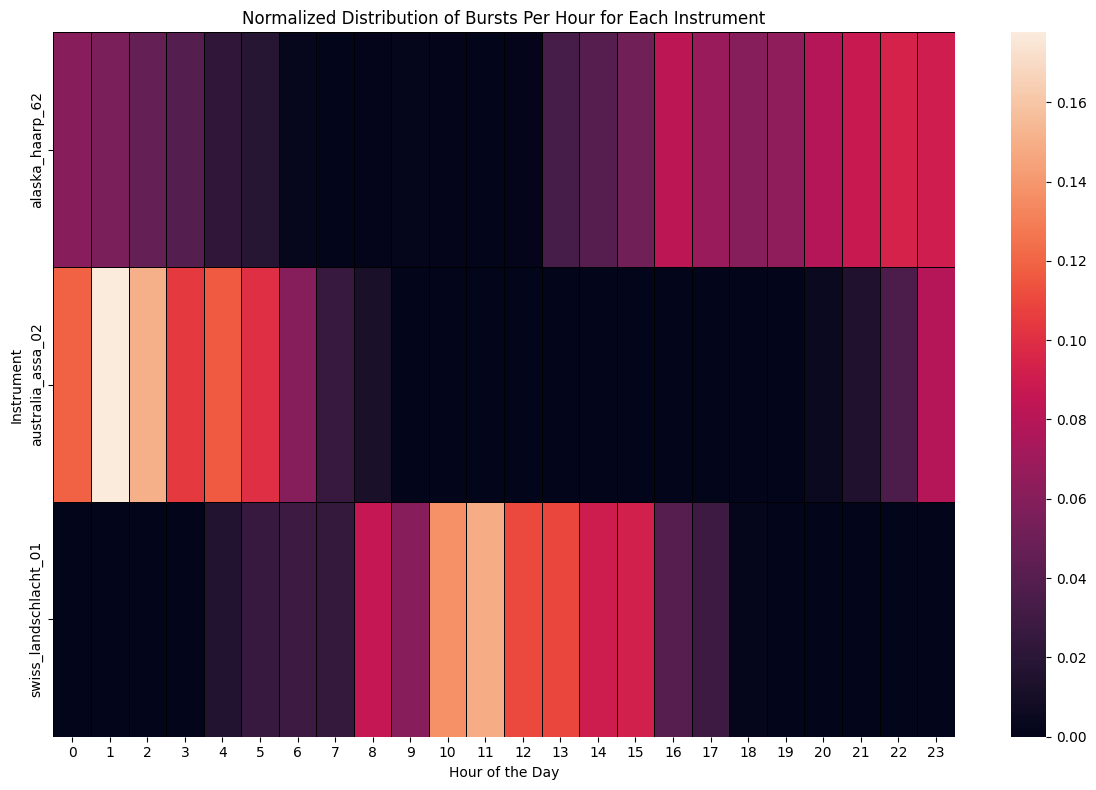

In [24]:
import seaborn as sns

# Extract the hour from the 'start_time' column
df["hour"] = df["start_time"].dt.hour

# Pivot the data to get a matrix with the count of bursts per instrument per hour
burst_hour_matrix = (
    df[df["is_burst"] == 1]
    .pivot_table(
        index="instrument", columns="hour", values="start_time", aggfunc="count"
    )
    .fillna(0)
)

# Normalize the matrix per instrument
burst_hour_matrix_normalized = burst_hour_matrix.div(
    burst_hour_matrix.sum(axis=1), axis=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    burst_hour_matrix_normalized,
    cbar=True,
    linewidths=0.5,
    linecolor="black",
    # cmap="plasma"
)

plt.title("Normalized Distribution of Bursts Per Hour for Each Instrument")
plt.xlabel("Hour of the Day")
plt.ylabel("Instrument")
plt.tight_layout()
plt.show()

In [20]:
df.instrument.value_counts()

instrument
australia_assa_02        26851
alaska_haarp_62          24558
swiss_landschlacht_01     9950
Name: count, dtype: int64